In [350]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [351]:
#Ejercicios Derivación

[]

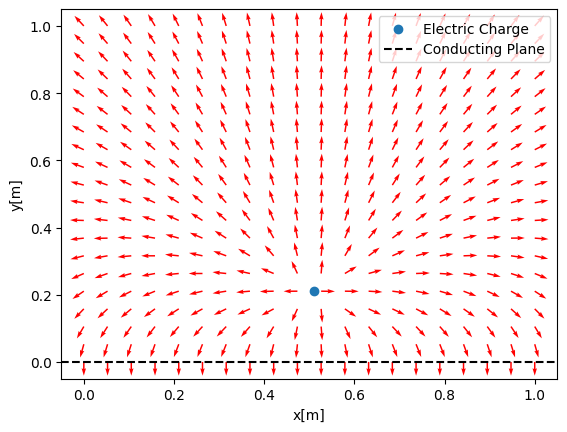

In [352]:
# 7. Electrodinámica

# a.
r_q = np.array([0.51, 0.21])
x = np.linspace(0,1,20)
y = np.linspace(0,1,20)
X, Y = np.meshgrid(x,y)

def PotencialElectrico(x,y):
    return 1/np.sqrt((x-r_q[0])**2 + (y-r_q[1])**2) - (1/np.sqrt((x-r_q[0])**2 + (y+r_q[1])**2))

def DerivadaParcialX(f,x,y,h=0.05):
    return (f(x+h,y) - f(x-h,y))/(2*h)

def DerivadaParcialY(f,x,y,h=0.05):
    return (f(x,y+h) - f(x,y-h))/(2*h)

def Gradiente(f,x,y):
    return np.array([(DerivadaParcialX(f,x,y)), DerivadaParcialY(f,x,y)])

CampoElectrico = -Gradiente(PotencialElectrico, X, Y)

#b.
Ex = CampoElectrico[0]
Ey = CampoElectrico[1]

Norma = np.sqrt(Ex**2 + Ey**2)

Norma[Norma == 0] = 1
Ex_N = Ex / Norma
Ey_N = Ey / Norma

ax = plt.subplot()
ax.set_xlabel("x[m]")
ax.set_ylabel("y[m]")
ax.scatter(r_q[0], r_q[1], label="Electric Charge")
ax.axhline(y=0, color='black', linestyle='--', label='Conducting Plane')
ax.quiver(X, Y, Ex_N, Ey_N, color = "red")
ax.legend()
ax.plot()

In [353]:
# 7. Coeficientes (Interpolación)

#a. 
x = sym.Symbol("x",real=True)
#b.
h = sym.Symbol("h",real=True)
#c.
X=[-1*h,0*h,3*h]
#d.

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

#e. 

def GetCoefficients(x,p,X):
    Coefficients = []
    for i in range(len(X)):
       Li = Lagrange(x,X,i)
       dLi = sym.diff(Li,x,1)
       C = dLi.subs(x, X[p])
       Coefficients.append(C)
    return Coefficients
Coefficients = GetCoefficients(x,1,X)
Coefficients 

[-3/(4*h), 2/(3*h), 1/(12*h)]

In [354]:
# Para sacar coeficientes de derivada central alrededor de un x=0:
x=sym.Symbol("x", real=True)
X=[-1,1,3,4]

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

bases=[]

for i in range(len(X)):
  bases.append(Lagrange(x, X, i))

dbases=[]

for i in range(len(bases)):
  f = bases[i]
  dbases.append(sym.diff(f,x,1))

coeficientes = []

for i in range(len(dbases)):
  coeficiente = dbases[i].subs(x,0)
  coeficientes.append(coeficiente)

coeficientes

  


[-19/40, 5/12, 1/8, -1/15]

In [355]:
#Ejercicios de Newton Raphson

In [356]:
def DerivadaCentral(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

def NewtonRaphson(f, xn, i_max = 1000, tolerancia=1e-7):
    error = 1
    i = 0
    while error > tolerancia and i < i_max:
        try:
            xn1 = xn - f(xn)/DerivadaCentral(f,xn)
            error = np.abs(f(xn)/DerivadaCentral(f,xn))
        except ZeroDivisionError:
            print("Error de división por cero")
        xn = xn1
        i += 1
    if i == i_max:
        return False
    else:
        return xn
    
def GetAllRoots(f, x, tolerancia = 6):
    Roots = np.array([])
    for i in x:
        possible_root = NewtonRaphson(f,i)

        if possible_root != False:
            root = round(possible_root, tolerancia)
            if root not in Roots:
                Roots = np.append(Roots, root)

    Roots.sort()
    return Roots


In [357]:
#3.
x = np.linspace(-2,2,100)
def FuncionTres(x):
    return 3*x**5 + 5*x**4 - x**3

Raices = GetAllRoots(FuncionTres,x)
Raices #Ya funciona: cambio de tolerancia

array([-1.847127, -0.      ,  0.18046 ])

In [358]:
Raices = {}
def Legendre(x,n):
    pass